In [215]:
import numpy as np
import matplotlib.pyplot as plt 

class GridEnvironment:
    def __init__(self):
        self.position = np.array([[0, 10, -20, -3],
                                  [-2, 15, 20, -1],
                                  [-7, -17, 30, -5],
                                  [-1, 0, 40, 100]])

        # self.position = np.array([[3, 0, 0, 0],
        #                           [-2, -4, 0, 0],
        #                           [0, 0, 7, 0],
        #                           [0, 0, 4, 100]])       
         
        self.current_position = (0, 0)
        self.previous_position = None
        self.action_space = ['Up', 'Down', 'Right', 'Left']
        self.observation_space = []
        for row in range(4):
            for column in range(4):
                self.observation_space.append((row, column))

    
    def step(self, action_taken):
        row, column = self.current_position
        new_position = None
    
        if action_taken == 'Up':
            new_position = (row - 1, column) if row > 0 else (row, column)
        elif action_taken == 'Down':
            new_position = (row + 1, column) if row < 3 else (row, column)
        elif action_taken == 'Right':
            new_position = (row, column + 1) if column < 3 else (row, column)
        elif action_taken == 'Left':
            new_position = (row, column - 1) if column > 0 else (row, column)
    
        if new_position == self.previous_position:
            reward = 0
        else:
            self.previous_position = self.current_position
            self.current_position = new_position
        
            if self.current_position not in self.observation_space:
                self.current_position = self.previous_position
                reward = 0
            else:
                reward = self.position[self.current_position]
    
        goal_reached = (self.current_position == (3, 3))
        return self.current_position, reward, goal_reached

    
    def reset(self):
        self.current_position = (0, 0)
        self.previous_position = None
        return self.current_position
    
    def render(self):
        states = np.zeros((4, 4))
        states[3, 3] = 1.0
        states[self.current_position] = 0.5
        plt.imshow(states)
        


Timestep: 1
Current state:
(1, 0)
Chosen action: Down, Reward: -2
Total reward: -2


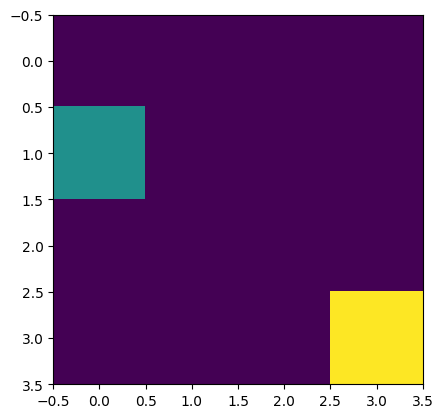

Timestep: 1
Current state:
(array([0, 0], dtype=int64), array([1, 0], dtype=int64))
Chosen action: Down, Reward: -2
Total reward: -2
Timestep: 2
Current state:
(1, 0)
Chosen action: Up, Reward: 0
Total reward: -2


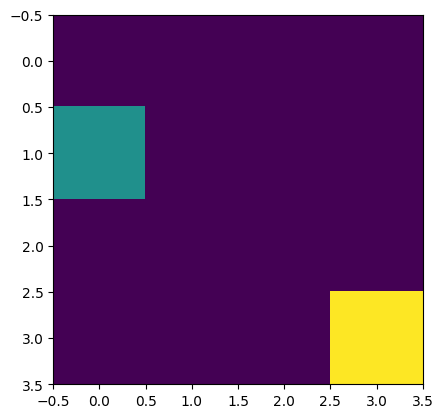

Timestep: 2
Current state:
(array([0, 0], dtype=int64), array([1, 0], dtype=int64))
Chosen action: Up, Reward: 0
Total reward: -2
Timestep: 3
Current state:
(1, 0)
Chosen action: Left, Reward: -2
Total reward: -2


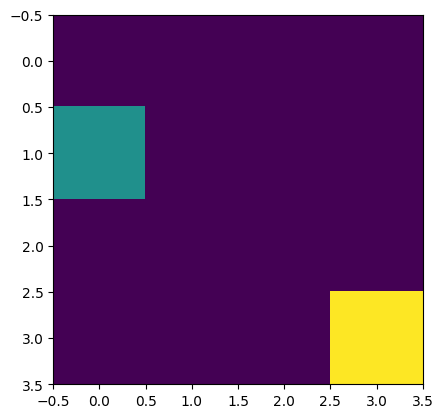

Timestep: 3
Current state:
(array([0, 0], dtype=int64), array([1, 0], dtype=int64))
Chosen action: Left, Reward: -2
Total reward: -2
Timestep: 4
Current state:
(1, 1)
Chosen action: Right, Reward: 15
Total reward: 13


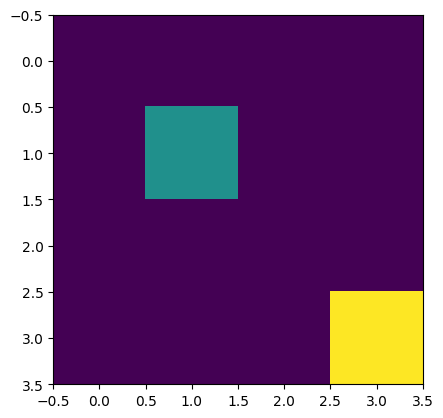

Timestep: 4
Current state:
(array([0, 0], dtype=int64), array([1, 1], dtype=int64))
Chosen action: Right, Reward: 15
Total reward: 13
Timestep: 5
Current state:
(1, 2)
Chosen action: Right, Reward: 20
Total reward: 33


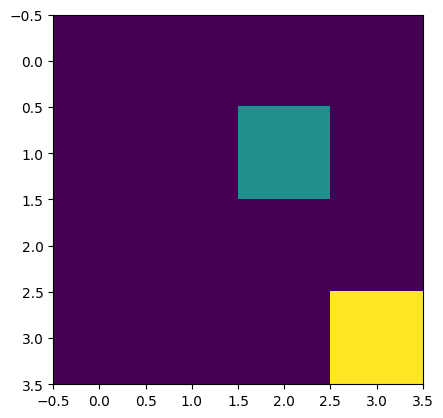

Timestep: 5
Current state:
(array([0, 0], dtype=int64), array([1, 2], dtype=int64))
Chosen action: Right, Reward: 20
Total reward: 33
Timestep: 6
Current state:
(2, 2)
Chosen action: Down, Reward: 30
Total reward: 63


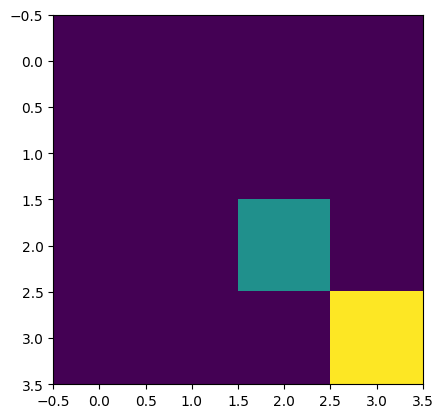

Timestep: 6
Current state:
(array([0, 0], dtype=int64), array([2, 2], dtype=int64))
Chosen action: Down, Reward: 30
Total reward: 63
Timestep: 7
Current state:
(2, 2)
Chosen action: Up, Reward: 0
Total reward: 63


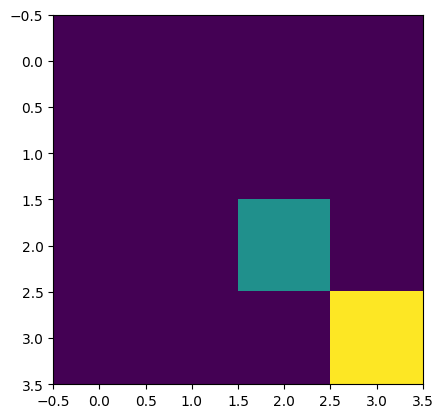

Timestep: 7
Current state:
(array([0, 0], dtype=int64), array([2, 2], dtype=int64))
Chosen action: Up, Reward: 0
Total reward: 63
Timestep: 8
Current state:
(3, 2)
Chosen action: Down, Reward: 40
Total reward: 103


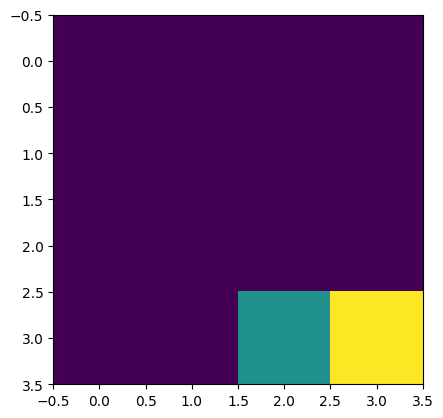

Timestep: 8
Current state:
(array([0, 0], dtype=int64), array([3, 2], dtype=int64))
Chosen action: Down, Reward: 40
Total reward: 103
Timestep: 9
Current state:
(3, 3)
Chosen action: Right, Reward: 100
Total reward: 203


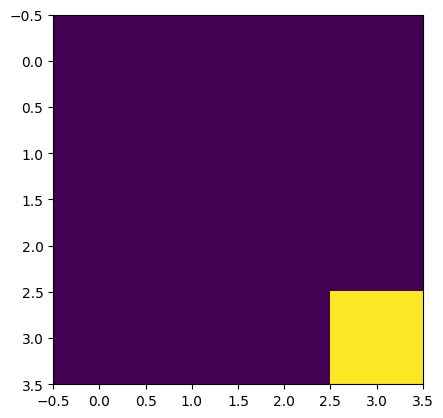

Timestep: 9
Current state:
(array([0, 0], dtype=int64), array([3, 3], dtype=int64))
Chosen action: Right, Reward: 100
Total reward: 203
Timestep: 10
Current state:
(3, 3)
Chosen action: Down, Reward: 100
Total reward: 203


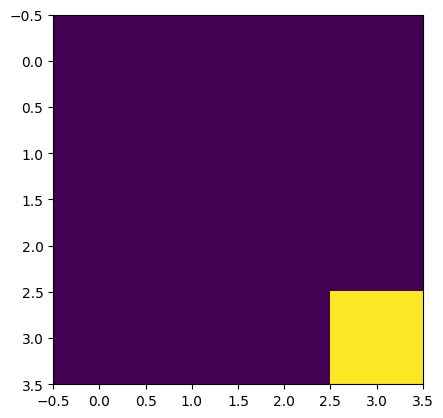

Timestep: 10
Current state:
(array([0, 0], dtype=int64), array([3, 3], dtype=int64))
Chosen action: Down, Reward: 100
Total reward: 203


In [216]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.action_space = env.action_space
    
    def step(self, obs):
        return np.random.choice(self.action_space)
    
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()
terminated = False
total_reward = 0  
prev_agent_pos = None  
x = []

for i in range(10):
    action = agent.step(obs)
    obs, reward, terminated = env.step(action)
    if prev_agent_pos is None or prev_agent_pos != env.current_position:
        total_reward += reward
        prev_agent_pos = env.current_position
    print(f"Timestep: {i+1}")
    print("Current state:")
    print(env.current_position)
    print(f"Chosen action: {action}, Reward: {reward}")
    print(f"Total reward: {total_reward}")
    x.append(total_reward)
    env.render()
    plt.show()
    print(f"Timestep: {i+1}")
    print("Current state:")
    print(np.unravel_index(obs, (4,4)))
    print(f"Chosen action: {action}, Reward: {reward}")
    print(f"Total reward: {total_reward}")  # Print the accumulated reward after the loop
    x.append(total_reward)


In [217]:
import numpy as np
import random

class SARSA:
    def __init__(self, env, alpha, gamma, epsilon,decay, no_of_episodes):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay=decay
        self.no_of_episodes = no_of_episodes
        self.Q_table = np.ones((len(self.env.observation_space), len(self.env.action_space))) * 10
        self.epsilon_decay = []
    
    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(self.env.action_space)
        else:
            q_vals = self.Q_table[self.env.observation_space.index(state), :]
            action = self.env.action_space[np.argmax(q_vals)]
        return action
    
    def update_Q(self, state, action, reward, next_state, next_action):
        current_q_val = self.Q_table[self.env.observation_space.index(state), self.env.action_space.index(action)]
        next_q_val = self.Q_table[self.env.observation_space.index(next_state), self.env.action_space.index(next_action)]
        error = reward + self.gamma * next_q_val - current_q_val
        self.Q_table[self.env.observation_space.index(state), self.env.action_space.index(action)] += self.alpha * error
    
    def train(self):
        rewards = []
        for episode in range(self.no_of_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            episode_reward = 0
            done = False
            while not done:
                next_state, reward, done = self.env.step(action)
                episode_reward += reward
                next_action = self.choose_action(next_state)
                self.update_Q(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            rewards.append(episode_reward)
            self.epsilon_decay.append(self.epsilon)
            self.epsilon *= self.decay  # Decay exploration rate
        return rewards
    def test(self):
        rewards = []
        for episode in range(self.no_of_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            episode_reward = 0
            done = False
            while not done:
                next_state, reward, done = self.env.step(action)
                episode_reward += reward
                next_action = self.choose_action(next_state)
                state = next_state
                action = next_action
            rewards.append(episode_reward)
            self.epsilon_decay.append(self.epsilon)
            self.epsilon *= self.decay  # Decay exploration rate
        return rewards




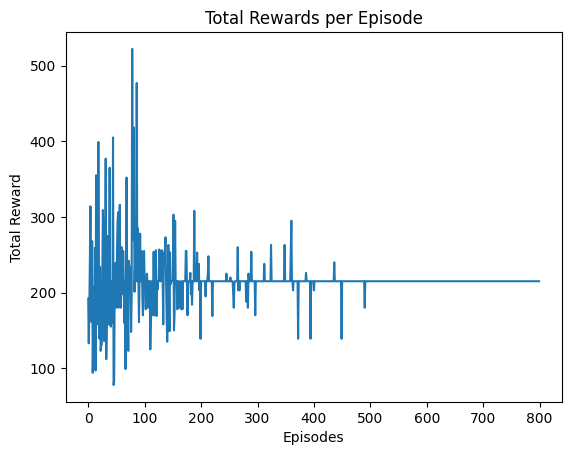

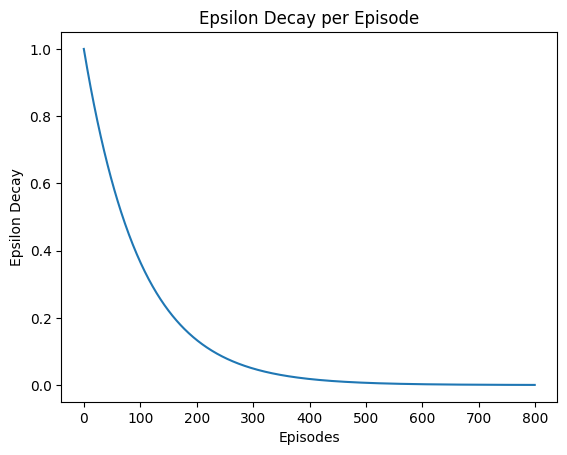

In [218]:
env = GridEnvironment()
agent = SARSA(env, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.99, no_of_episodes=800)
rewards = agent.train()


plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

plt.plot(np.arange(len(agent.epsilon_decay)), agent.epsilon_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Decay')
plt.title('Epsilon Decay per Episode')
plt.show()

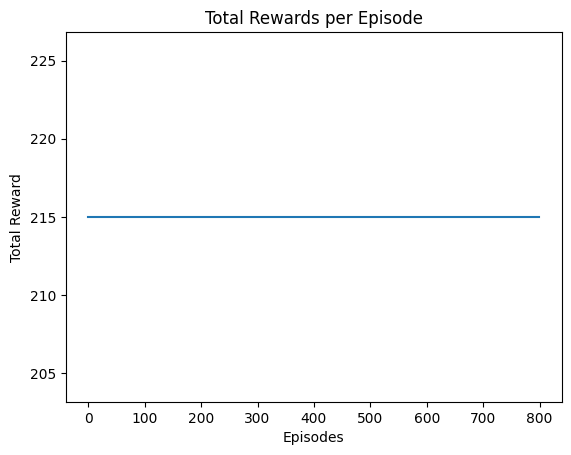

In [219]:
reward = agent.test()
plt.plot(np.arange(len(reward)), reward)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

In [220]:
alphas = [0.01, 0.05, 0.1]  # potential values for alpha
gammas = [0.9, 0.95, 0.97]  # potential values for gamma

best_alpha = None
best_gamma = None
best_reward = -np.inf  # initialize best reward as negative infinity

for alpha in alphas:
    for gamma in gammas:
        agent = SARSA(env, alpha, gamma, epsilon=1.0, decay=0.99, no_of_episodes=500)
        rewards = agent.train()

        # Calculate total reward for this combination of alpha and gamma
        total_reward = np.sum(rewards)

        if total_reward > best_reward:
            best_reward = total_reward
            best_alpha = alpha
            best_gamma = gamma

print(f"Best alpha: {best_alpha}, Best gamma: {best_gamma}")



Best alpha: 0.01, Best gamma: 0.97


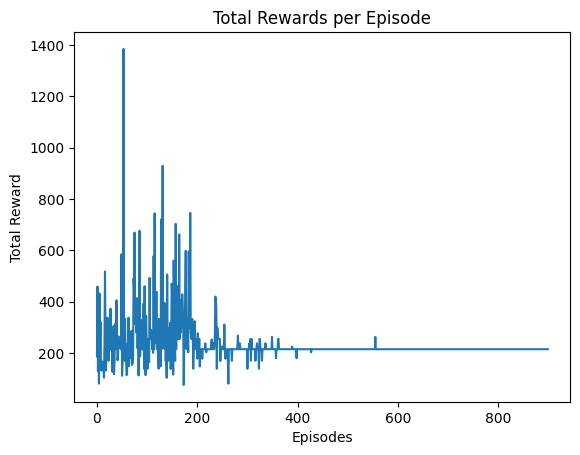

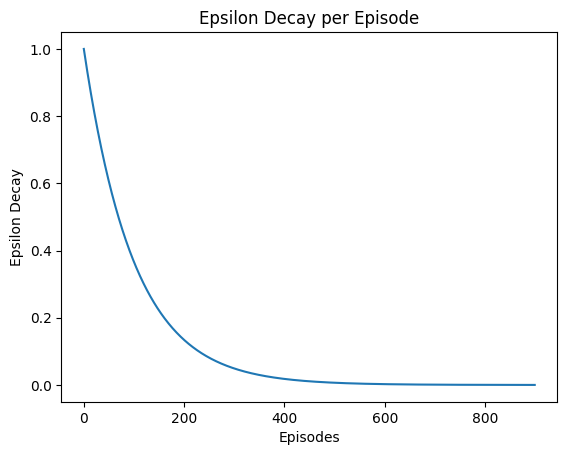

In [221]:
agent = SARSA(env, alpha=0.2, gamma=0.95, epsilon=1.0, decay=0.99, no_of_episodes=900)
rewards = agent.train()

plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

plt.plot(np.arange(len(agent.epsilon_decay)), agent.epsilon_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Decay')
plt.title('Epsilon Decay per Episode')
plt.show()

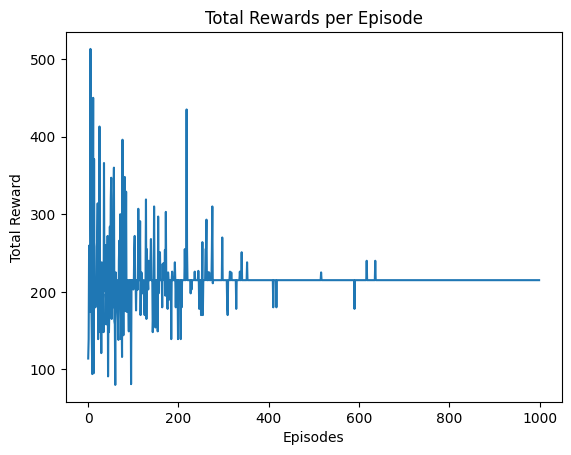

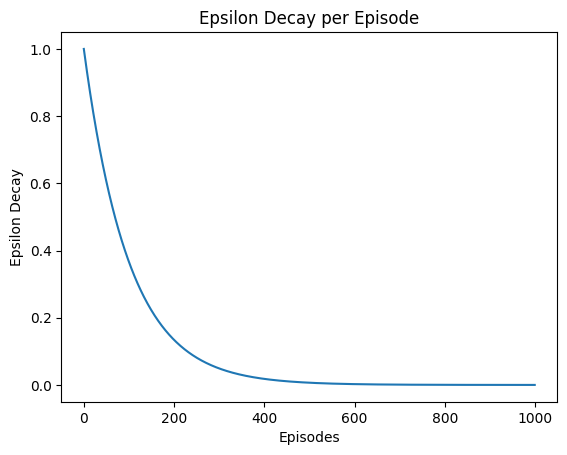

In [222]:
agent = SARSA(env, alpha=0.1, gamma=0.97, epsilon=1.0, decay=0.99, no_of_episodes=1000)
rewards = agent.train()

plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

plt.plot(np.arange(len(agent.epsilon_decay)), agent.epsilon_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Decay')
plt.title('Epsilon Decay per Episode')
plt.show()

In [223]:
import numpy as np
import random
import matplotlib.pyplot as plt

class QLearning:
    def __init__(self, env, alpha, gamma, epsilon, epsilon_decay,no_of_episodes):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.num_episodes=no_of_episodes
        self.q_table = np.zeros((len(env.observation_space), len(env.action_space)))
        self.eps_decay=[]
    def state_to_int(self, state):
        return self.env.observation_space.index(state)
    
    def action_to_int(self, action):
        return self.env.action_space.index(action)
    
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(env.action_space)
        else:
            return self.env.action_space[np.argmax(self.q_table[self.state_to_int(state)])]
    
    def update_q_table(self, state, action, reward, next_state):
        state = self.state_to_int(state)
        action = self.action_to_int(action)
        next_state = self.state_to_int(next_state)
        max_next_q = np.max(self.q_table[next_state])
        self.q_table[state, action] += self.alpha * (reward + self.gamma * max_next_q - self.q_table[state, action])
    
    def decay_epsilon(self):
        self.epsilon *= self.epsilon_decay
    
    def train(self):
        rewards = []
        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_reward = 0
            while True:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                episode_reward += reward
                state = next_state
                if done:
                    break
            self.eps_decay.append(self.epsilon)
            self.decay_epsilon()
            rewards.append(episode_reward)
        return rewards
    def test(self):
        rewards = []
        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_reward = 0
            while True:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                episode_reward += reward
                state = next_state
                if done:
                    break
            self.eps_decay.append(self.epsilon)
            self.decay_epsilon()
            rewards.append(episode_reward)
        return rewards

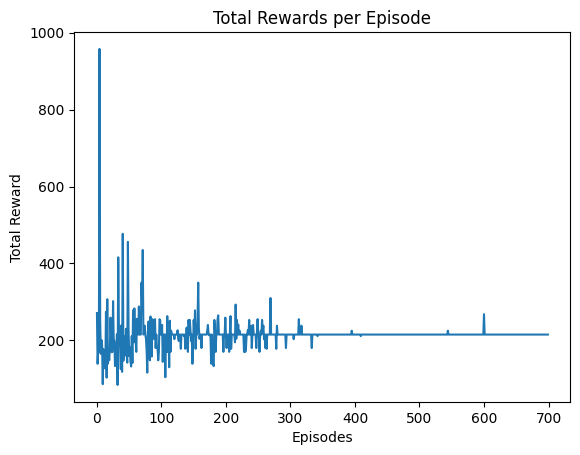

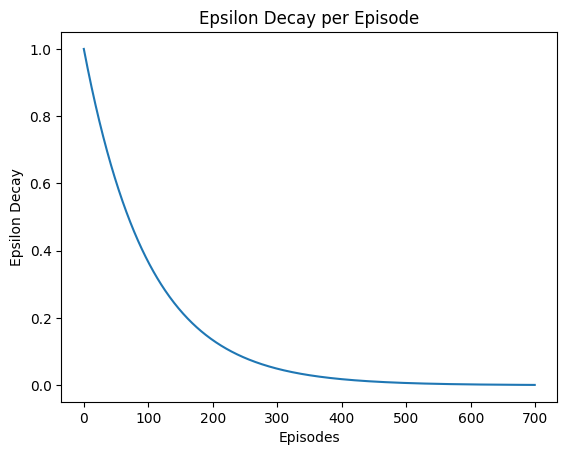

In [224]:
env = GridEnvironment()
agent = QLearning(env, alpha=0.01, gamma=0.99, epsilon=1.0, epsilon_decay=0.99,no_of_episodes=700)
rewards = agent.train()
plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

plt.plot(np.arange(len(agent.eps_decay)), agent.eps_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Decay')
plt.title('Epsilon Decay per Episode')
plt.show()

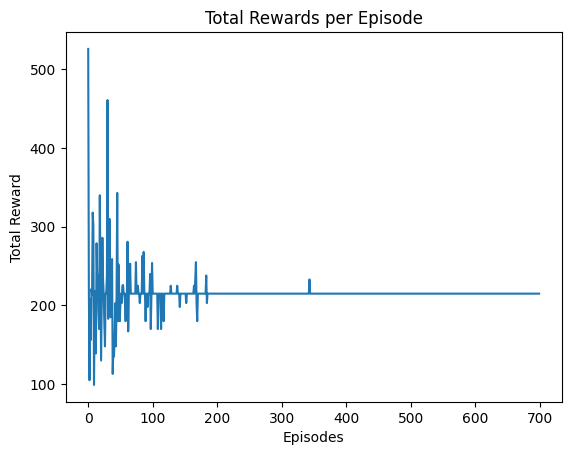

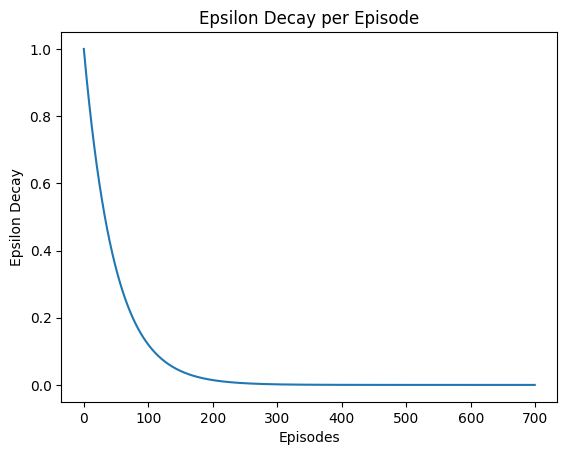

In [225]:
agent = QLearning(env, alpha=0.01, gamma=0.95, epsilon=1.0, epsilon_decay=0.979,no_of_episodes=700)
rewards = agent.train()

plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()
plt.plot(np.arange(len(agent.eps_decay)), agent.eps_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Decay')
plt.title('Epsilon Decay per Episode')
plt.show()

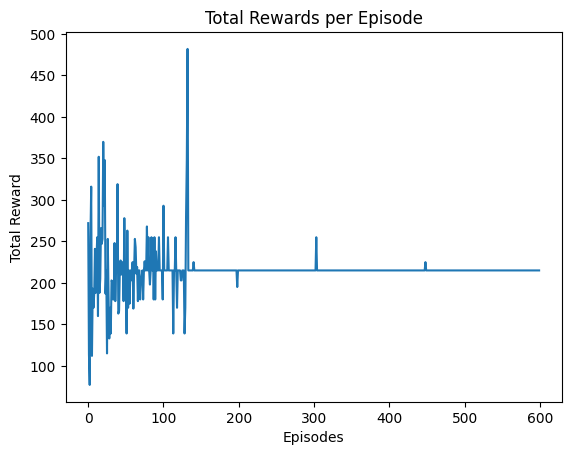

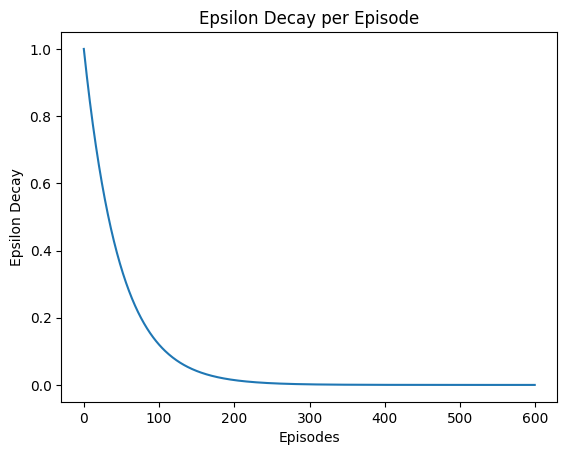

In [226]:
agent = QLearning(env, alpha=0.1, gamma=0.97, epsilon=1.0, epsilon_decay=0.979,no_of_episodes=600)
rewards = agent.train()

plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()
plt.plot(np.arange(len(agent.eps_decay)), agent.eps_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Decay')
plt.title('Epsilon Decay per Episode')
plt.show()


In [231]:
# Set the range of possible values
alphas = [0.1, 0.01]
gammas = [0.9, 0.95, 0.99]
epsilon_decays = [0.97, 0.95, 0.979]  # example values

best_reward = -float('inf')
best_params = None

for alpha in alphas:
    for gamma in gammas:
        for epsilon_decay in epsilon_decays:
            # Create a new agent with the current parameters
            agent = QLearning(env, alpha=alpha, gamma=gamma, epsilon=1.0, epsilon_decay=epsilon_decay, no_of_episodes=500)
            
            # Train the agent and get the rewards
            rewards = agent.train()
            
            # Evaluate the performance
            total_reward = sum(rewards)
            
            # Check if this is the best performance so far
            if total_reward > best_reward:
                best_reward = total_reward
                best_params = (alpha, gamma, epsilon_decay)

print(f"Best parameters are alpha={best_params[0]}, gamma={best_params[1]}, epsilon_decay={best_params[2]}")


Best parameters are alpha=0.01, gamma=0.9, epsilon_decay=0.979


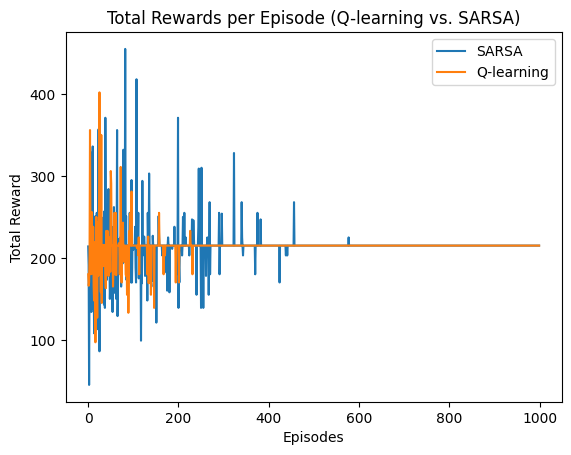

In [228]:
agent_qlearning = QLearning(env, alpha=0.1, gamma=0.97, epsilon=1.0, epsilon_decay=0.979,no_of_episodes=1000)
rewards_qlearning = agent_qlearning.train()

# SARSA
agent_sarsa = SARSA(env, alpha=0.01, gamma=0.97, epsilon=1.0, decay=0.99, no_of_episodes=1000)
rewards_sarsa = agent_sarsa.train()

# Plotting the results
plt.plot(np.arange(len(rewards_sarsa)), rewards_sarsa, label='SARSA')
plt.plot(np.arange(len(rewards_qlearning)), rewards_qlearning, label='Q-learning')

plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode (Q-learning vs. SARSA)')
plt.legend()
plt.show()
